# DIGITS RECOGNITION

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
mnist = load_digits()

In [3]:
mnist.data[0].size

64

In [4]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
X = mnist.data
Y = mnist.target
sample = np.random.randint(X.shape[0], size = 1000)

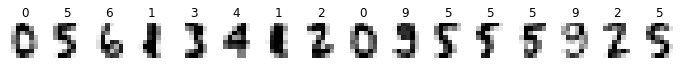

In [6]:
sample_viz = X.reshape(-1, 8, 8)
plt.figure(figsize = (12, 8))
for index, val in enumerate(np.random.randint(X.shape[0], size = 16)):
    plt.subplot(1, 16, index + 1)
    plt.axis('off')
    plt.imshow(sample_viz[val], cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('%i' % Y[val])
plt.show()

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size = 0.2)

In [13]:
 knn = KNeighborsClassifier(5)

In [14]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
print(knn.predict(Xval[:10]))
print(yval[:10])

[5 2 8 7 1 8 2 2 1 2]
[5 2 8 7 1 8 2 2 1 2]


In [16]:
nrange = range(2, 10)
errors = []
for n in nrange:
    knn = KNeighborsClassifier(n)
    knn.fit(Xtrain, ytrain)
    error = 1 - knn.score(Xtest, ytest)
    errors.append(error)
    

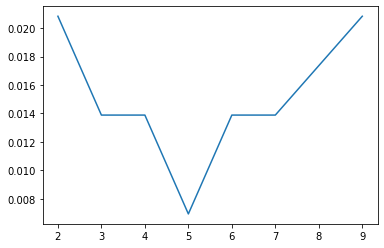

In [17]:
plt.plot(nrange, errors)